## Data loading and pre-processing

In [1]:
import pandas as pd

df=pd.read_csv(r"C:\Users\shras\Desktop\project\final_dataset.csv", low_memory = False)

In [2]:
df.head()

,OccNo,OccID,ComponentSeq,SuspectedComponentFailureIND,TestPerformedIND,PartNameID,PartNameID_DisplayEng,Manufacturer,Model,TrainSeq,...,EmployeeFatalInjuries,EmployeeSeriousInjuries,EmployeeMinorInjuries,RSPassengerFatalInjuries,RSPassengerSeriousInjuries,RSPassengerMinorInjuries,TotalRSPassengerInjuries,OtherFatalInjuries,OtherSeriousInjuries,OtherMinorInjuries
0,R15T0302,122705,1.0,1.0,0.0,36.0,BODY BOLSTER,TRINITY,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R15T0300,122703,1.0,1.0,0.0,36.0,BODY BOLSTER,TRINITY,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R15T0164,121813,1.0,1.0,0.0,34.0,"BEARING, ROLLER",NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R15T0017,121029,1.0,1.0,NaN,104.0,WHEEL RIM,GRIFFIN WHEEL CO,CH 36,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R13T0075,118024,1.0,1.0,NaN,65.0,ENGINE,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns.tolist()

['OccNo',
 'OccID',
 'ComponentSeq',
 'SuspectedComponentFailureIND',
 'TestPerformedIND',
 'PartNameID',
 'PartNameID_DisplayEng',
 'Manufacturer',
 'Model',
 'TrainSeq',
 'TrainName',
 'RSSeq',
 'RollingStock',
 'ManufacturedDate',
 'LastOverhaulDate',
 'LabNameID',
 'LabNameID_DisplayEng',
 'ProjectNo',
 'DateSent',
 'Offtrain_EmployeeFatal',
 'Offtrain_EmployeeSerious',
 'Offtrain_EmployeeMinor',
 'Offtrain_TotalEmployeeInjuries',
 'Offtrain_RS_PassengerFatal',
 'Offtrain_RS_PassengerSerious',
 'Offtrain_RS_PassengerMinor',
 'Offtrain_Total_RS_PassengerInjuries',
 'Offtrain_VehicleOperatorFatal',
 'Offtrain_VehicleOperatorSerious',
 'Offtrain_VehicleOperatorMinor',
 'Offtrain_TotalVehicleOperatorInjuries',
 'Offtrain_VehiclePassengerFatal',
 'Offtrain_VehiclePassengerSerious',
 'Offtrain_VehiclePassengerMinor',
 'Offtrain_TotalVehiclePassengerInjuries',
 'Offtrain_PedestrianFatal',
 'Offtrain_PedestrianSerious',
 'Offtrain_PedestrianMinor',
 'Offtrain_TotalPedestrianInjuries',
 'Of

In [4]:
print("Total number of datasets (rows):", len(df))

Total number of datasets (rows): 62563


In [6]:
# Print unique values
print(df['OccClassID_DisplayEng'].unique())

['5' '3' '2' '1' 'C-5' 'C-4' 'B-2' 'C-3' 2 3 1 '4']


In [7]:
# Replace specific values
df['OccClassID_DisplayEng'] = df['OccClassID_DisplayEng'].replace({
    'B-2': 2,
    'C-5': 5,
    'C-4': 4,
    'C-3': 3
})

# Print unique values
print(df['OccClassID_DisplayEng'].unique())

['5' '3' '2' '1' 5 4 2 3 1 '4']


In [8]:
df['OccClassID_DisplayEng'] = df['OccClassID_DisplayEng'].astype(int)

# Print unique values
print(df['OccClassID_DisplayEng'].unique())

[5 3 2 1 4]


In [10]:
# Define input features and target variable
features = [
    "Offtrain_EmployeeFatal", "Offtrain_EmployeeSerious", "Offtrain_EmployeeMinor", "Offtrain_TotalEmployeeInjuries",
    "Offtrain_RS_PassengerFatal", "Offtrain_RS_PassengerSerious", "Offtrain_RS_PassengerMinor", "Offtrain_Total_RS_PassengerInjuries",
    "Offtrain_VehicleOperatorFatal", "Offtrain_VehicleOperatorSerious", "Offtrain_VehicleOperatorMinor", "Offtrain_TotalVehicleOperatorInjuries",
    "Offtrain_VehiclePassengerFatal", "Offtrain_VehiclePassengerSerious", "Offtrain_VehiclePassengerMinor", "Offtrain_TotalVehiclePassengerInjuries",
    "Offtrain_PedestrianFatal", "Offtrain_PedestrianSerious", "Offtrain_PedestrianMinor", "Offtrain_TotalPedestrianInjuries",
    "Offtrain_TrespasserFatal", "Offtrain_TrespasserSerious", "Offtrain_TrespasserMinor", "Offtrain_TotalTrespasserInjuries",
    "Offtrain_OtherFatal", "Offtrain_OtherSerious", "Offtrain_OtherMinor", "Offtrain_TotalOtherInjuries",
    "TotalOffTrainFatalities", "TotalOffTrainSeriousInjuries", "TotalOffTrainMinorInjuries"
]
target = "OccClassID_DisplayEng"

nan_counts = df[features + [target]].isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

Offtrain_EmployeeFatal                    5000
Offtrain_EmployeeSerious                  5000
Offtrain_EmployeeMinor                    5000
Offtrain_TotalEmployeeInjuries            5000
Offtrain_RS_PassengerFatal                5000
Offtrain_RS_PassengerSerious              5000
Offtrain_RS_PassengerMinor                5000
Offtrain_Total_RS_PassengerInjuries       5000
Offtrain_VehicleOperatorFatal             5000
Offtrain_VehicleOperatorSerious           5000
Offtrain_VehicleOperatorMinor             5000
Offtrain_TotalVehicleOperatorInjuries     5000
Offtrain_VehiclePassengerFatal            5000
Offtrain_VehiclePassengerSerious          5000
Offtrain_VehiclePassengerMinor            5000
Offtrain_TotalVehiclePassengerInjuries    5000
Offtrain_PedestrianFatal                  5000
Offtrain_PedestrianSerious                5000
Offtrain_PedestrianMinor                  5000
Offtrain_TotalPedestrianInjuries          5000
Offtrain_TrespasserFatal                  5000
Offtrain_Tres

In [11]:
# Remove rows with NaNs in specified columns
df_cleaned = df.dropna(subset=features)

# Check if NaNs are removed
nan_counts = df_cleaned[features + [target]].isna().sum()
print(nan_counts)

Offtrain_EmployeeFatal                    0
Offtrain_EmployeeSerious                  0
Offtrain_EmployeeMinor                    0
Offtrain_TotalEmployeeInjuries            0
Offtrain_RS_PassengerFatal                0
Offtrain_RS_PassengerSerious              0
Offtrain_RS_PassengerMinor                0
Offtrain_Total_RS_PassengerInjuries       0
Offtrain_VehicleOperatorFatal             0
Offtrain_VehicleOperatorSerious           0
Offtrain_VehicleOperatorMinor             0
Offtrain_TotalVehicleOperatorInjuries     0
Offtrain_VehiclePassengerFatal            0
Offtrain_VehiclePassengerSerious          0
Offtrain_VehiclePassengerMinor            0
Offtrain_TotalVehiclePassengerInjuries    0
Offtrain_PedestrianFatal                  0
Offtrain_PedestrianSerious                0
Offtrain_PedestrianMinor                  0
Offtrain_TotalPedestrianInjuries          0
Offtrain_TrespasserFatal                  0
Offtrain_TrespasserSerious                0
Offtrain_TrespasserMinor        

## Feature importance using correlation analysis

Top 10 Features based on Correlation with Target:
['TotalOffTrainSeriousInjuries', 'Offtrain_TotalTrespasserInjuries', 'Offtrain_TrespasserFatal', 'Offtrain_VehicleOperatorSerious', 'Offtrain_TrespasserSerious', 'Offtrain_TotalVehiclePassengerInjuries', 'Offtrain_VehiclePassengerMinor', 'Offtrain_PedestrianMinor', 'Offtrain_PedestrianFatal', 'TotalOffTrainFatalities']


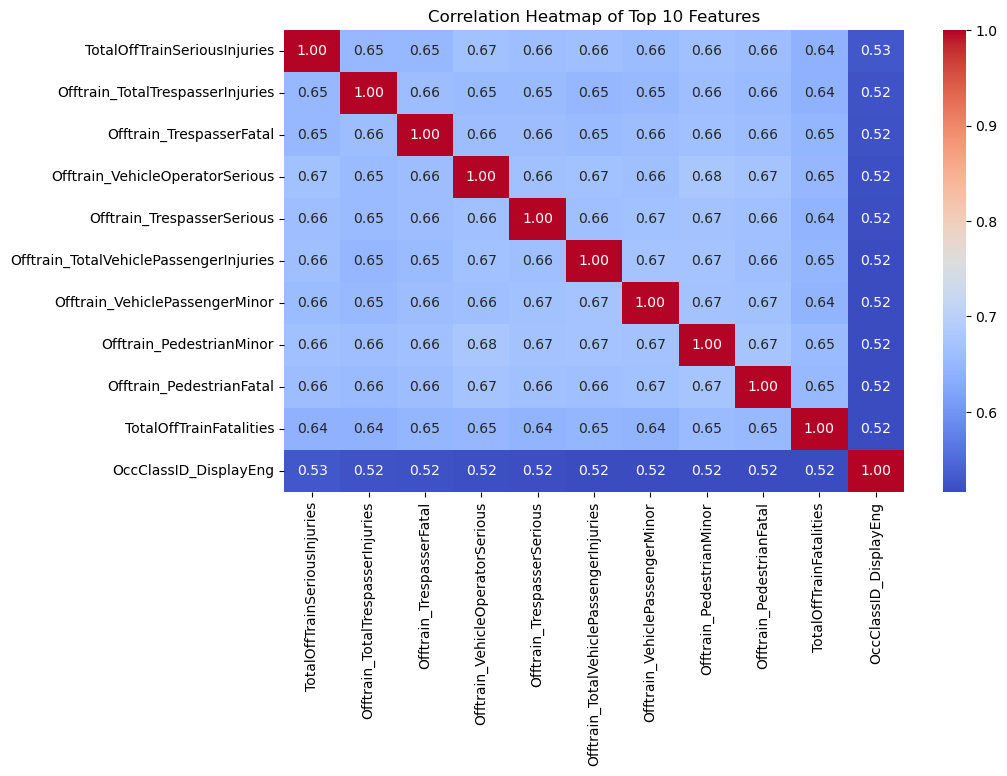

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned[features + [target]].corr()

# Get correlation values with the target variable
target_correlation = corr_matrix[target].drop(target).abs().sort_values(ascending=False)

# Select the top 10 correlated features
top_10_corr_features = target_correlation.head(10).index.tolist()

# Print top 10 features
print("Top 10 Features based on Correlation with Target:")
print(top_10_corr_features)

# Plot heatmap of top 10 correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[top_10_corr_features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Features")
plt.show()

In [13]:
# Shift target labels to start from 0
df_cleaned.loc[:, target] = df_cleaned[target] - df_cleaned[target].min()

# Check the unique values to verify
print(df_cleaned[target].unique())


[2 4 1 3 0]


In [14]:
# Class distribution before SMOTE
print("\nClass Distribution Before SMOTE:")
print(df_cleaned[target].value_counts())


Class Distribution Before SMOTE:
OccClassID_DisplayEng
4    39200
3     5870
2     4467
1     4150
0     3876
Name: count, dtype: int64


## Predictive models

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import xgboost as xgb

# Imbalanced-learn for resampling
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler


df = df_cleaned.copy()

# Select only the top 10 correlated features
X = df[top_10_corr_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply undersampling to reduce class imbalance (if needed)
undersample = RandomUnderSampler(sampling_strategy={4: 5000}, random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# SMOTE-Tomek: Balances the dataset and removes noise
smote_tomek = SMOTETomek(sampling_strategy={0: 4000, 1: 4500, 2: 4500, 3: 4696, 4: 5000}, random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_under, y_train_under)

# Check new class distribution
print("Class Distribution After Resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Feature selection using Mutual Information
mi_scores = mutual_info_classif(X_train_resampled, y_train_resampled)
top_features = np.argsort(mi_scores)[-10:]  # Get top 10 features

X_train_selected = X_train_resampled.iloc[:, top_features]
X_test_selected = X_test.iloc[:, top_features]

# Reduce dimensionality using PCA (Optional)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Define classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(eval_metric="mlogloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
}

# Train and evaluate models
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train_resampled)
    y_pred = clf.predict(X_test_pca)

    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Stacking Classifier: Combining multiple models
stacked_clf = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("xgb", xgb.XGBClassifier(eval_metric="mlogloss", random_state=42)),
        ("gb", GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

stacked_clf.fit(X_train_pca, y_train_resampled)
y_pred_stacked = stacked_clf.predict(X_test_pca)

print("\nStacking Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacked))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacked, zero_division=1))

Class Distribution After Resampling:
OccClassID_DisplayEng
4    4880
3    4622
1    4491
2    4459
0    3996
Name: count, dtype: int64

XGBoost Model Evaluation:
Accuracy: 0.6349344219577868

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00       775
           1       0.18      0.92      0.31       830
           2       0.20      0.03      0.05       894
           3       0.16      0.10      0.12      1174
           4       0.98      0.82      0.89      7840

    accuracy                           0.63     11513
   macro avg       0.30      0.37      0.47     11513
weighted avg       0.71      0.63      0.71     11513


Decision Tree Model Evaluation:
Accuracy: 0.6011465300095544

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.03      0.05       775
           1       0.18      0.88      0.30       830
           2       0.08      0.03      0.04  

C:\Users\shras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Stacking Model Evaluation:
Accuracy: 0.635542430296187

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       775
           1       0.19      0.95      0.31       830
           2       0.15      0.01      0.01       894
           3       0.15      0.09      0.11      1174
           4       0.98      0.82      0.89      7840

    accuracy                           0.64     11513
   macro avg       0.49      0.37      0.27     11513
weighted avg       0.78      0.64      0.64     11513



## Tuning

Training size: 40294, Validation size: 5756, Test size: 11513
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Model Evaluation on Validation Set:

XGBoost Model:
Accuracy: 0.6978804725503822
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       388
           1       0.10      0.00      0.00       415
           2       1.00      0.00      0.00       446
           3       0.25      0.83      0.38       587
           4       0.94      0.90      0.92      3920

    accuracy                           0.70      5756
   macro avg       0.46      0.35      0.26      5756
weighted avg       0.75      0.70      0.66      5756


Random Forest Model:
Accuracy: 0.6977067407922168
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       388
           1       0.00      0.00      0.00       415
           2       0.00      0.

C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metr


SVM Model:
Accuracy: 0.6978804725503822
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       388
           1       0.00      0.00      0.00       415
           2       0.00      0.00      0.00       446
           3       0.24      0.84      0.38       587
           4       0.94      0.90      0.92      3920

    accuracy                           0.70      5756
   macro avg       0.24      0.35      0.26      5756
weighted avg       0.67      0.70      0.67      5756


Model Evaluation on Test Set:

XGBoost Model:
Accuracy: 0.6897420307478502
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       775
           1       0.29      0.01      0.01       830
           2       0.00      0.00      0.00       894
           3       0.24      0.80      0.37      1174
           4       0.93      0.89      0.91      7840

    accuracy                           0.69     11513
   macro avg  

C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metr


SVM Model:
Accuracy: 0.6891340224094502
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       775
           1       0.00      0.00      0.00       830
           2       0.00      0.00      0.00       894
           3       0.24      0.82      0.37      1174
           4       0.94      0.89      0.91      7840

    accuracy                           0.69     11513
   macro avg       0.23      0.34      0.26     11513
weighted avg       0.66      0.69      0.66     11513



C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


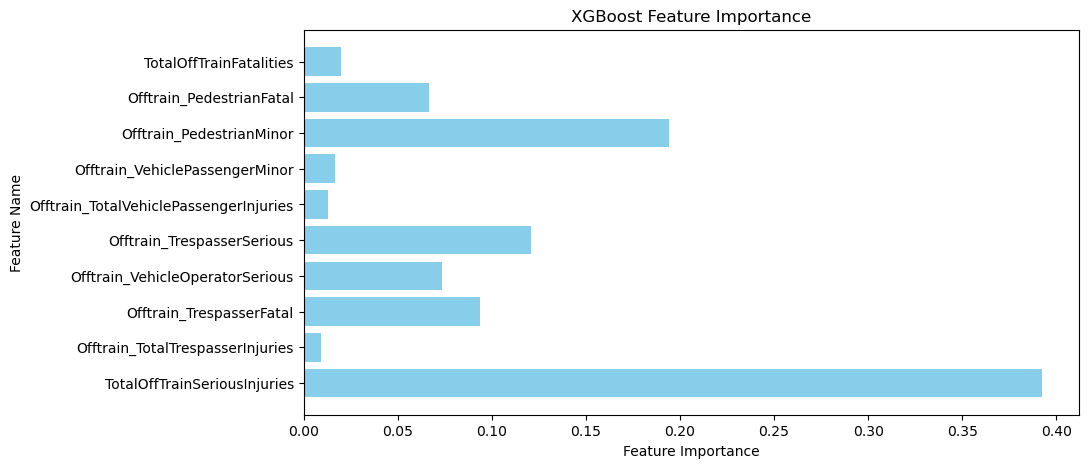

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt

# Perform 70-10-20 Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# Dictionary to store best models
best_models = {}

# ------------------- XGBoost Tuning -------------------
xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid = GridSearchCV(
    xgb.XGBClassifier(eval_metric="mlogloss", random_state=42), 
    param_grid=xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, refit=True
)
xgb_grid.fit(X_train, y_train)
best_models["XGBoost"] = xgb_grid.best_estimator_

# ------------------- Random Forest Tuning -------------------
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_models["Random Forest"] = rf_grid.best_estimator_

# ------------------- Decision Tree Tuning -------------------
dt_params = {'max_depth': [5, 10], 'min_samples_split': [2, 5]}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
best_models["Decision Tree"] = dt_grid.best_estimator_

# ------------------- SVM Tuning -------------------
svm_params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_models["SVM"] = svm_grid.best_estimator_

# ------------------- Model Evaluation on Validation Set -------------------
print("\nModel Evaluation on Validation Set:")
for name, model in best_models.items():
    y_val_pred = model.predict(X_val)
    print(f"\n{name} Model:")
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

# ------------------- Model Evaluation on Test Set -------------------
print("\nModel Evaluation on Test Set:")
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    print(f"\n{name} Model:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

# ------------------- Save Best Models -------------------
for name, model in best_models.items():
    joblib.dump(model, f"{name}_best_model.pkl")


In [21]:
# Print Best Parameters for XGBoost
print("Best Parameters for XGBoost:")
print(xgb_grid.best_params_)

Best Parameters for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


## XAI

In [23]:
!pip install shap

In [35]:
import lime
import lime.lime_tabular
import numpy as np
import joblib
import pandas as pd

# Loading the best XGBoost model
best_xgb = joblib.load("XGBoost_best_model.pkl")

# Ensure X_train is in the correct format
X_train_array = np.array(X_train)

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_array,  
    feature_names=X_train.columns.tolist(),  # Convert to list for compatibility
    class_names=np.unique(y_train).astype(str),
    mode="classification"
)

# Select a sample instance to explain
instance_index = 5  #  this can be changed to analyze different samples
instance = X_val.iloc[instance_index].values.reshape(1, -1)  

# Generate explanation for Class 3
exp = explainer.explain_instance(
    data_row=instance.flatten(), 
    predict_fn=best_xgb.predict_proba,  
    labels=[3]  # Focus on Class 3 instead of the default Class 1
)

# Show explanation in notebook
exp.show_in_notebook()